In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
heartdata = pd.read_csv('heart_kaggle_project.csv')
#leaving out some data checks and descriptive statistics because contained in data transformation and scouting NB

In [3]:
heartdata = heartdata.reindex(np.random.permutation(heartdata.index))

In [4]:
heartdata = heartdata.reset_index(drop=True)
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
1,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
2,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
3,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
4,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1


In [5]:
#scaling continuous variables, I am including restecg, slope, and ca because I think of
#these as directional values, not categorical

In [6]:
heartdata[['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca']] = StandardScaler().fit_transform(heartdata[['age', 'trestbps', 'chol','restecg', 'thalach', 'oldpeak', 'slope', 'ca']])
heartdata.head()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.062485,0,2,0.478391,1.289705,0,0.898962,-0.727976,0,-0.724323,0.976352,-0.714429,3,1
1,0.841908,0,0,0.478391,2.855069,0,-1.005832,0.321556,0,0.138373,-0.649113,-0.714429,2,1
2,-0.260980,1,1,-0.206964,-0.797447,1,0.898962,1.502280,0,-0.896862,0.976352,-0.714429,2,1
3,-0.371269,0,2,0.478391,1.193077,0,-1.005832,-0.334401,0,0.397182,0.976352,0.265082,2,1
4,-1.143291,1,2,-0.663867,-0.391612,0,0.898962,0.846322,0,-0.896862,0.976352,-0.714429,2,1


In [7]:
#drop categorical values
x = heartdata.drop(['sex', 'cp', 'fbs', 'exang', 'thal', 'target'], axis = 1)
x.head()

,age,trestbps,chol,restecg,thalach,oldpeak,slope,ca
0,1.062485,0.478391,1.289705,0.898962,-0.727976,-0.724323,0.976352,-0.714429
1,0.841908,0.478391,2.855069,-1.005832,0.321556,0.138373,-0.649113,-0.714429
2,-0.260980,-0.206964,-0.797447,0.898962,1.502280,-0.896862,0.976352,-0.714429
3,-0.371269,0.478391,1.193077,-1.005832,-0.334401,0.397182,0.976352,0.265082
4,-1.143291,-0.663867,-0.391612,0.898962,0.846322,-0.896862,0.976352,-0.714429


In [8]:
y = heartdata['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [10]:
pca.explained_variance_ratio_

array([0.29109979, 0.16025912])

In [11]:
print((pca.explained_variance_ratio_).sum())

0.45135891102708386


In [12]:
finalDf = pd.concat([principalDf, heartdata[['target']]], axis = 1)
finalDf.head()

,PC1,PC2,target
0,-0.046910,1.215715,1
1,1.063511,2.076105,1
2,-2.162716,-0.070059,1
3,0.293917,1.343118,1
4,-2.303076,-0.419929,1


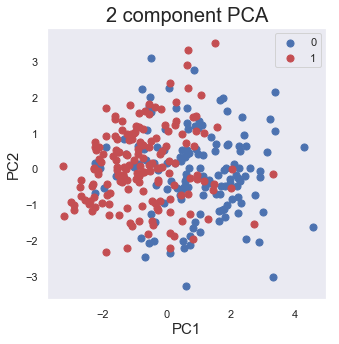

In [13]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
#not very satisfying - and it's known correlation between target and some categorical data is "good"
#so adding in sex, cp, exang, thal 

In [15]:
x_d = pd.get_dummies(heartdata, columns=['sex', 'cp', 'exang', 'thal'])
x_d = x_d.drop('target', axis = 1)
x_d.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,sex_0,...,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,1.062485,0.478391,1.289705,0,0.898962,-0.727976,-0.724323,0.976352,-0.714429,1,...,0,0,1,0,1,0,0,0,0,1
1,0.841908,0.478391,2.855069,0,-1.005832,0.321556,0.138373,-0.649113,-0.714429,1,...,1,0,0,0,1,0,0,0,1,0
2,-0.260980,-0.206964,-0.797447,1,0.898962,1.502280,-0.896862,0.976352,-0.714429,0,...,0,1,0,0,1,0,0,0,1,0
3,-0.371269,0.478391,1.193077,0,-1.005832,-0.334401,0.397182,0.976352,0.265082,1,...,0,0,1,0,1,0,0,0,1,0
4,-1.143291,-0.663867,-0.391612,0,0.898962,0.846322,-0.896862,0.976352,-0.714429,0,...,0,0,1,0,1,0,0,0,1,0


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_d)
principalDf2 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [17]:
pca.explained_variance_ratio_

array([0.24981568, 0.12983318])

In [18]:
print((pca.explained_variance_ratio_).sum())

0.37964886375372


In [19]:
finalDf2 = pd.concat([principalDf2, heartdata[['target']]], axis = 1)
finalDf2.head()

,PC1,PC2,target
0,-0.171711,1.406604,1
1,0.775475,2.402233,1
2,-2.342693,-0.122073,1
3,-0.096790,1.567771,1
4,-2.451404,-0.554866,1


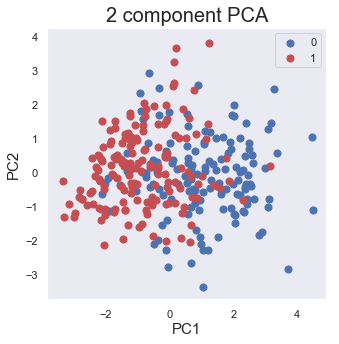

In [20]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC1']
               , finalDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
#Completely the same - the top 2 pricipal components are in the true numerical 
#data (age,trestbps,chol,restecg,thalach,oldpeak,slope, ca).
#However, added variables cause PC1, PC2  to contribute less to the overall variance 

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_d)
principalDf3 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [23]:
pca.explained_variance_ratio_

array([0.24981568, 0.12983318, 0.09876902])

In [24]:
print((pca.explained_variance_ratio_).sum())

0.4784178818976405


In [25]:
# even with 3 components, less than 50% of variance explained, will run models anyway...

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
classifiers = []
RFmodel = RandomForestClassifier()
classifiers.append(RFmodel)
SVMmodel = svm.SVC()
classifiers.append(SVMmodel)
DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)
KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)
LRmodel = LogisticRegression()
classifiers.append(LRmodel)
GBmodel = GradientBoostingClassifier()
classifiers.append(GBmodel)
ABmodel = AdaBoostClassifier()
classifiers.append(ABmodel)

In [90]:
# 3 component modeled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf3, y, test_size=0.2) 
from sklearn import metrics
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print(i)
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()

ValueError: Found input variables with inconsistent numbers of samples: [303, 20]

In [28]:
# Nothing great with 3 components
# FIND COMPONENTS THAT EXPLAIN 95% OF VARIANCE AND THEN SCOUT MODELS

In [29]:
pca = PCA(.95)

In [30]:
new_x = pca.fit_transform(x_d)

In [31]:
pca.n_components_ 

12

In [32]:
#Based on 2 component visualization - there is obviously 2 clusters but with significant overlap
#the 2 component and 3 component analysis preserved less than 50% 
#It takes 12 components to preserve 95% of the variance...
#Because of this and because we are working with a small data set, while I will scout models with PCA(95% var) dataset, 
#I will likely optimize models with dataset from Data transformation and scouting NB
#... I gut is that PCA data reduction isn't real helpful in this case... we shall see....

In [33]:
#PREPARING PC DATAFRAME, TEST SET HOLDOUT, AND DATA SET FOR SCOUTING MODELS AND OPTIMIZING
pc12df = pd.DataFrame(data = new_x, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12'])
pc12df.head()

FinalDF = pd.concat([pc12df, heartdata[['target']]], axis = 1)
FinalDF.head()

testDFholdoutDF = FinalDF.tail(20)
X_testHO = testDFholdoutDF.drop('target', axis =1)
y_testHO = testDFholdoutDF['target']

train_val_DF = FinalDF.head(283)
X_tv = train_val_DF.drop('target', axis=1)
y_tv = train_val_DF['target']

In [34]:
# 12 components - model scouting 
Xtrain, Xval, ytrain, yval = train_test_split(X_tv, y_tv, test_size=0.2)
for i in classifiers:
    i.fit(Xtrain, ytrain)
    ypred= i.predict(Xval)
    print((i))
    print('Model score: ', i.score(Xtrain, ytrain))
    print("Accuracy:  ", metrics.accuracy_score(yval, ypred))
    cm = metrics.confusion_matrix(yval, ypred)
    print("Confusion Matrix: ")
    print(cm)
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9867256637168141
Accuracy:   0.7017543859649122
Confusion Matrix: 
[[16  8]
 [ 9 24]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.9380530973451328
Accuracy:   0.7368421052631579
Confusion Matrix: 
[[13 11]
 [ 4 29]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
      

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Model score:  1.0
Accuracy:   0.6666666666666666
Confusion Matrix: 
[[13 11]
 [ 8 25]]



In [35]:
#Well - this worked pretty well!!!! Even overfit RF, DT, etc have OK scores 
#will work on optimize a select group for low false negatives
#CROSS-VALIDATION BELOW


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
for i in classifiers:
    scores = cross_val_score(i, Xtrain, ytrain, cv=5)
    scores
    print(i)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.78 (+/- 0.09)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy: 0.83 (+/- 0.10)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy: 0.85 (+/- 0.06)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Accuracy: 0.81 (+/- 0.04)



In [37]:
#WILL "TUNE" LOGISTIC REGRESSION AND GRADIENTBOOST  dual=[True,False]

In [38]:
#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()

max_iter=[200, 300, 500, 1000]
C = [0.01, 0.05, 0.1, 0.5, 1, 10]
solver = ['warn', 'liblinear']
penalty = ['l1', 'l2']
param_grid = dict(max_iter=max_iter, C=C, solver=solver, penalty = penalty)
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1)


grid_result = grid.fit(Xtrain, ytrain)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.862832 using {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'warn'}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()

max_iter=[200, 300, 500, 1000]
C = [0.01, 0.05, 0.1, 0.5, 1, 10]
solver = ['warn', 'liblinear', 'lbfgs']
param_grid = dict(max_iter=max_iter, C=C, solver=solver)
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1)


grid_result = grid.fit(Xtrain, ytrain)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.871681 using {'C': 0.05, 'max_iter': 200, 'solver': 'lbfgs'}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [166]:
#Will also cross-validation with Optimized parameters
Optlr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 200, C =0.05)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Optlr, X_tv, y_tv, cv=5)
print('Cross Validation of partially optimized Logistic regression')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(Optlr)

Cross Validation of partially optimized Logistic regression
Accuracy: 0.86 (+/- 0.05)
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


Prediction with a validation set using OptLR
Model score:  0.8849557522123894
Accuracy:   0.7368421052631579
Confusion Matrix: 


Text(0.5, 8.5, 'Predicted label')

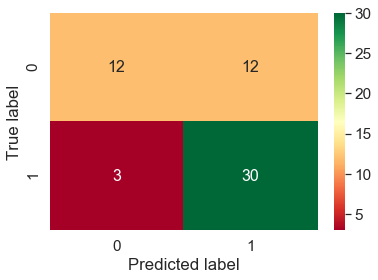

In [135]:
#Save new LR parameters, fit to training set, and run with validation set
Optlr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 200, C =0.05)
Optlr.fit(Xtrain, ytrain)
ypred= Optlr.predict(Xval)
print('Prediction with a validation set using OptLR')
print('Model score: ', Optlr.score(Xtrain, ytrain))
print('Accuracy:  ', metrics.accuracy_score(yval, ypred))
cm = metrics.confusion_matrix(yval, ypred)
print("Confusion Matrix: ")
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap='RdYlGn')
plt.ylabel('True label') 
plt.xlabel('Predicted label')

In [ ]:
#Although the accuracy isn't great - only 3 out of 33 patients with heart disease were not recognized as having the disease,
#Unfortunately (main reason for low accuracy) half of the patients without heart would have been pegged as having it... 
#nonetheless..cross-validation suggests this is a good model  so I will continue with lr - retrain model with training and validation data and see how the model does
#with unseen data

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
#Compute false and true positive rates
fpr, tpr,_=roc_curve(Optlr.predict(Xtrain), ytrain, drop_intermediate=False)

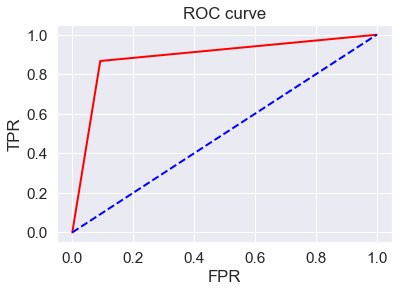

In [144]:
plt.figure()
#ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [145]:
print('ROCAUC score:', roc_auc_score(Optlr.predict(Xtrain), ytrain))

ROCAUC score: 0.8876753826530612


In [146]:
from sklearn.metrics import classification_report
ypred = Optlr.predict(Xval)
print(classification_report(yval, ypred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        24
           1       0.71      0.91      0.80        33

   micro avg       0.74      0.74      0.74        57
   macro avg       0.76      0.70      0.71        57
weighted avg       0.75      0.74      0.72        57



(226, 2)


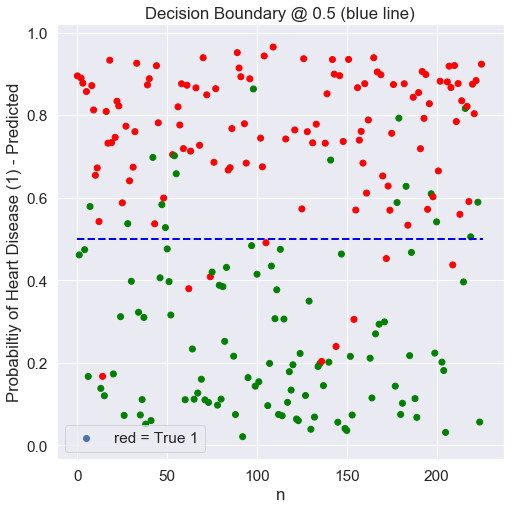

Red = Patients with known heart disease (Label = 1)
Green = Patients with known to disease free (Label = 0)
Model score:  0.8849557522123894


In [147]:
#plot Decision boundary based on training data
yseries = pd.Series(ytrain)
y4color = np.array(yseries)

probs = Optlr.predict_proba(Xtrain)
print(probs.shape)
probone = probs[:, 1]

x = len(probone)
xx = [i for i in range(0, x)]

import matplotlib

y = probone
label = y4color
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(xx, y, c=label, cmap=matplotlib.colors.ListedColormap(colors), label = 'red = True 1')
plt.legend()
plt.plot([0, x], [0.5, 0.5], color='blue', lw=2, linestyle='--')

loc = np.arange(0,max(label),max(label)/float(len(colors)))
plt.xlabel('n')
plt.ylabel('Probabiltiy of Heart Disease (1) - Predicted')
plt.title('Decision Boundary @ 0.5 (blue line) - Training Data')
plt.legend()
plt.show()
print('Red = Patients with known heart disease (Label = 1)')
print('Green = Patients with known to disease free (Label = 0)')
print('Model score: ', Optlr.score(Xtrain, ytrain))

(226, 2)


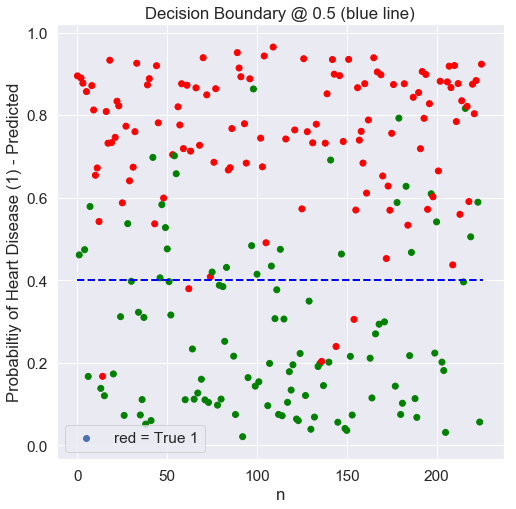

Red = Patients with known heart disease (Label = 1)
Green = Patients with known to disease free (Label = 0)


In [148]:
#plot Decision boundary based on training data
yseries = pd.Series(ytrain)
truey4color = np.array(yseries)

probs = Optlr.predict_proba(Xtrain)
print(probs.shape)
probone = probs[:, 1]

x = len(probone)
xx = [i for i in range(0, x)]

y = probone
label = truey4color
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(xx, y, c=label, cmap=matplotlib.colors.ListedColormap(colors), label = 'red = True 1')
plt.plot([0, x], [0.4, 0.4], color='blue', lw=2, linestyle='--')

loc = np.arange(0,max(label),max(label)/float(len(colors)))
plt.xlabel('n')
plt.ylabel('Probabiltiy of Heart Disease (1) - Predicted')
plt.title('Decision Boundary @ 0.4 (blue line)')
plt.legend()
plt.show()
print('Red = Patients with known heart disease (Label = 1)')
print('Green = Patients with known to disease free (Label = 0)')

In [ ]:
#lowing theshold looks like it the increase in false positive would out weigh false negative in this model so won't do

No handles with labels found to put in legend.


(57, 2)


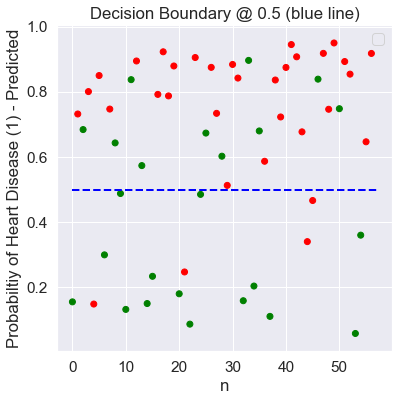

Red = Patients with known heart disease (Label = 1)
Green = Patients with known to disease free (Label = 0)


In [156]:
#plot Decision boundary based on validation data
yseries = pd.Series(yval)
y4color = np.array(yseries)

probs = Optlr.predict_proba(Xval)
print(probs.shape)
probone = probs[:,1 ]

x = len(probone)
xx = [i for i in range(0, x)]

import matplotlib

y = probone
label = y4color
colors = ['green','red']
fig = plt.figure(figsize=(6,6))
plt.scatter(xx, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot([0, x], [0.5, 0.5], color='blue', lw=2, linestyle='--')

loc = np.arange(0,max(label),max(label)/float(len(colors)))
plt.xlabel('n')
plt.ylabel('Probabiltiy of Heart Disease (1) - Predicted')
plt.title('Decision Boundary @ 0.5 (blue line)')
plt.legend()
plt.show()
print('Red = Patients with known heart disease (Label = 1)')
print('Green = Patients with known to disease free (Label = 0)')

Prediction with a validation set using OptLR
Model score:  0.8849557522123894
Accuracy:   0.85
Confusion Matrix: 


Text(0.5, 8.5, 'Predicted label')

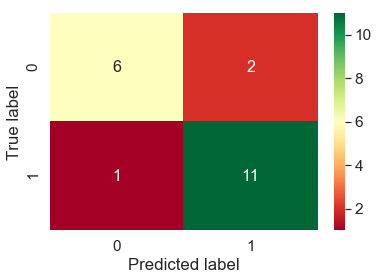

In [157]:
#see how model trained with only training data do on unseen data, compare to model trained with all training & val data next
Optlr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 200, C =0.05)
Optlr.fit(Xtrain, ytrain)
ypred= Optlr.predict(X_testHO)
print('Prediction with a validation set using OptLR')
print('Model score: ', Optlr.score(Xtrain, ytrain))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap='RdYlGn')
plt.ylabel('True label') 
plt.xlabel('Predicted label')

Prediction with Holdout test set using OptLR
Model score:  0.8692579505300353
Accuracy:   0.85
Confusion Matrix: 


Text(0.5, 8.5, 'Predicted label')

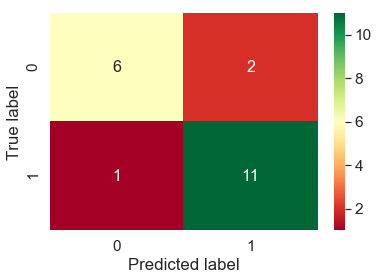

In [158]:
#Fit on all but holdout and then test
Optlr.fit(X_tv, y_tv)
ypred= Optlr.predict(X_testHO)
print('Prediction with Holdout test set using OptLR')
print('Model score: ', Optlr.score(X_tv, y_tv))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='RdYlGn')
plt.ylabel('True label') 
plt.xlabel('Predicted label')

No handles with labels found to put in legend.


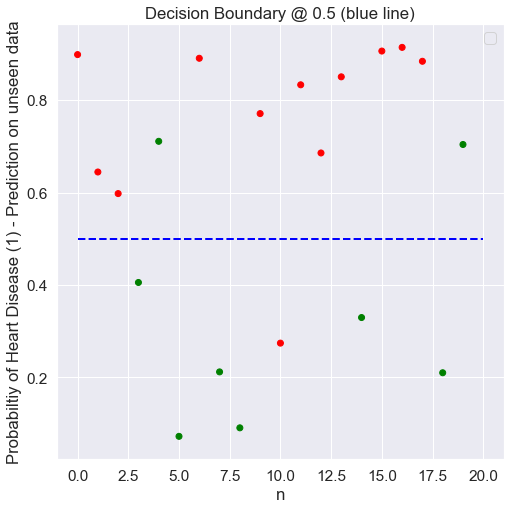

Red = Patients with known heart disease (Label = 1)
Green = Patients with known to disease free (Label = 0)


In [159]:
#plot decision boundary on unseen data
yseries = pd.Series(y_testHO)
y4color = np.array(yseries)

probs = Optlr.predict_proba(X_testHO)
probone = probs[:, 1]

x = len(probone)
xx = [i for i in range(0, x)]

import matplotlib

y = probone
label = y4color
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(xx, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot([0, x], [0.5, 0.5], color='blue', lw=2, linestyle='--')

loc = np.arange(0,max(label),max(label)/float(len(colors)))
plt.xlabel('n')
plt.ylabel('Probabiltiy of Heart Disease (1) - Prediction on unseen data')
plt.title('Decision Boundary @ 0.5 (blue line)')
plt.legend()
plt.show()
print('Red = Patients with known heart disease (Label = 1)')
print('Green = Patients with known to disease free (Label = 0)')

In [160]:
#saving model - does pretty well in the longrun
import pickle
FinalLR = 'finalized_model.sav'
pickle.dump(Optlr, open(FinalLR, 'wb'))

In [161]:
#EXPLORE GRADIENTBOOSTING

In [162]:
#Optimize pamameters Random and Grid searches

In [163]:
gb01= GradientBoostingClassifier()
learning_rate =[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
n_estimators = [10, 20, 30, 40, 50, 60, 70]
max_depth =[2, 3, 4, 5]
max_features = ['auto', None]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]

param_grid = dict(max_depth = max_depth, max_features = max_features, min_samples_split = min_samples_split, learning_rate = learning_rate, n_estimators = n_estimators)
random = RandomizedSearchCV(estimator=gb01, param_distributions=param_grid, cv = None)

random_result = random.fit(X_tv, y_tv)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.816254 using {'n_estimators': 30, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.15}


In [164]:
gb02= GradientBoostingClassifier()
learning_rate =[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
n_estimators = [10, 20, 30, 40, 50, 60, 70]
max_depth =[2, 3, 4, 5]
max_features = ['auto', None]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]

param_grid = dict(max_depth = max_depth, max_features = max_features, min_samples_split = min_samples_split, learning_rate = learning_rate, n_estimators = n_estimators)
grid = GridSearchCV(estimator=gb02, param_grid=param_grid, cv = 5)


grid_result = grid.fit(X_tv, y_tv)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.833922 using {'learning_rate': 0.15, 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 50}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [165]:
#Cross- validation with Optimized parameters
Optgb = GradientBoostingClassifier(max_depth = 2, max_features = 'auto', min_samples_split = 8, learning_rate = 0.15, n_estimators = 50)
scores = cross_val_score(Optgb, X_tv, y_tv, cv=10)
print('Cross Validation of partially optimized Logistic regression')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation of partially optimized Logistic regression
Accuracy: 0.83 (+/- 0.10)


Prediction with Holdout test set using Optgb
Model score:  0.9434628975265018
Accuracy:   0.75
Confusion Matrix: 


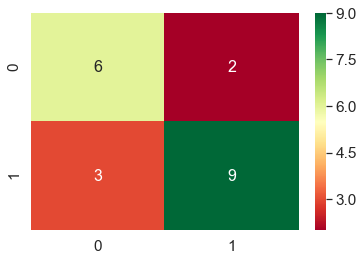

In [89]:
Optgb = GradientBoostingClassifier(max_depth = 2, max_features = 'auto', min_samples_split = 8, learning_rate = 0.15, n_estimators = 50)
Optgb.fit(X_tv, y_tv)
ypred= Optgb.predict(X_testHO)
print('Prediction with Holdout test set using Optgb')
print('Model score: ', Optgb.score(X_tv, y_tv))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap='RdYlGn')

In [70]:
import pickle
FinalGB = 'finalized_GB.sav'
pickle.dump(Optgb, open(FinalGB, 'wb'))

In [71]:
#Two good models found - will work on present and submit by July 7, 2019
#May work with other models if time permits

In [72]:
#Well - this worked pretty well!!!! Principal Conponents modeled with logistic Regression!!!!
#except false negatives higher than I'd like - thinking about trying this as my model but changing 
#the "probability balance" (don't know what its called) so false neg minimize 
svm.SVC?
print(svm.SVC())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [64]:

sm = svm.SVC()

kernels = ['linear', 'rbf', 'poly']
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid = dict(kernel = kernels, C = Cs, gamma = gammas)
grid1 = GridSearchCV(estimator=sm, param_grid=param_grid, cv = 10)
print(param_grid)

grid_result1 = grid1.fit(X_tv, y_tv)
# Summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_)) 

{'kernel': ['linear', 'rbf', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
Best: 0.848057 using {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Prediction with Holdout test set using Optgb
Model score:  0.8586572438162544
Accuracy:   0.85
Confusion Matrix: 


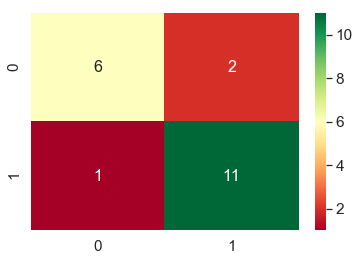

In [88]:
Optsm = svm.SVC(C = 1, gamma=0.01, kernel = 'rbf')
Optsm.fit(X_tv, y_tv)
ypred= Optsm.predict(X_testHO)
print('Prediction with Holdout test set using Optgb')

print('Model score: ', Optsm.score(X_tv, y_tv))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap='RdYlGn')

In [ ]:
#Other models to look at
Fmodel = RandomForestClassifier()
classifiers.append(RFmodel)

DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)

KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)

ABmodel = AdaBoostClassifier()
classifiers.append(ABmodel)


In [78]:
#examine Random Forest
from sklearn.model_selection import GridSearchCV
n_estimators = [50, 100, 200]
max_depth = [3, 5, 8, 15]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

para_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RFmodel, para_grid, cv = 5)
bestF = gridF.fit(Xtrain, ytrain)
print('Best fit', gridF.best_params_)

Best fit {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9734513274336283
Accuracy:   0.7543859649122807
Confusion Matrix: 


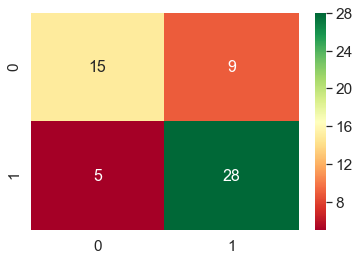

In [87]:
RFmodel = RandomForestClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
RFmodel.fit(Xtrain, ytrain)
y_pred= RFmodel.predict(Xval)
print(RFmodel)
print('Model score: ', RFmodel.score(Xtrain, ytrain))
print("Accuracy:  ", metrics.accuracy_score(yval, y_pred))
cm = metrics.confusion_matrix(yval, y_pred)
print("Confusion Matrix: ")


sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap='RdYlGn')